In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv('kmeans.csv')
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


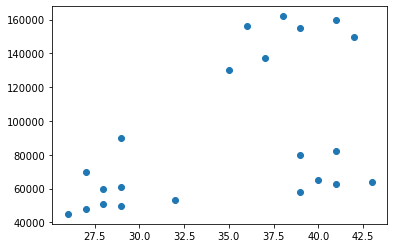

In [47]:
plt.scatter(df.Age,df['Income($)'])

In [48]:
from sklearn.cluster import KMeans

In [49]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [50]:
predictions=km.fit_predict(df[['Age','Income($)']])

In [51]:
df['predictions']=predictions

In [52]:
df

,Name,Age,Income($),predictions
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [53]:
df1=df[df.predictions==0]
df2=df[df.predictions==1]
df3=df[df.predictions==2]

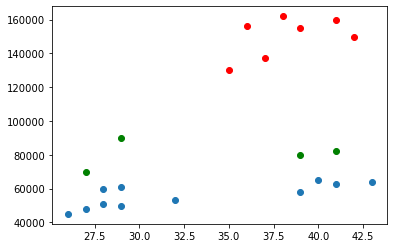

In [54]:
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')

In [55]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(df[['Income($)']])
df['Income($)']=mms.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),predictions
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [56]:
mms.fit(df[['Age']])
df['Age']=mms.transform(df[['Age']])

In [57]:
df.head()

,Name,Age,Income($),predictions
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


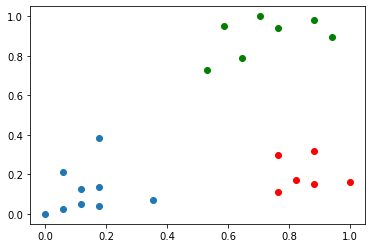

In [58]:
predictions=km.fit_predict(df[['Age','Income($)']])
df['predictions']=predictions
df1=df[df.predictions==0]
df2=df[df.predictions==1]
df3=df[df.predictions==2]
plt.scatter(df1.Age,df1['Income($)'])
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')

In [59]:
sse_list=[]
for i in range(20):
    km=KMeans(n_clusters=i+1)
    km.fit(df[['Income($)','Age']])
    sse_list.append(km.inertia_)


In [60]:
rng=range(1,21)

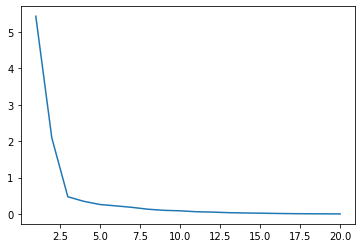

In [61]:
plt.plot(rng,sse_list)